In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [ ]:
path = kagglehub.dataset_download("vetrirah/customer")

100%|██████████| 105k/105k [00:00<00:00, 31.2MB/s]

Extracting files...


In [ ]:
customers = pd.read_csv(path + "/Train.csv")

In [ ]:
customers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
customers.isna().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [ ]:
customers = customers.loc[customers.isnull().sum(axis=1) < 3]

In [ ]:
customers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
customers.drop(columns=['ID'], inplace=True)

<ipython-input-9-23cceb5ee4df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.drop(columns=['ID'], inplace=True)


In [ ]:
customers.duplicated().sum()

417

In [ ]:
customers = customers.drop_duplicates()

## EDA (Exploratory Data Analysis)

In [ ]:
customers.isna().sum()

,0
Gender,0
Ever_Married,134
Age,0
Graduated,72
Profession,113
Work_Experience,790
Spending_Score,0
Family_Size,317
Var_1,72
Segmentation,0


In [ ]:
## Dummy dataset
customers_dummy = customers.dropna()

In [ ]:
customers_dummy.isna().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [ ]:
customers_dummy

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...
8061,Male,Yes,65,No,Artist,0.0,Average,2.0,Cat_6,C
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
customers_dummy.Age.describe()

,Age
count,6273.000000
mean,43.635740
std,16.303682
min,18.000000
25%,31.000000
50%,41.000000
75%,53.000000
max,89.000000


In [ ]:
customers_dummy['Age_Bin'] = pd.cut(customers_dummy.Age, bins=[17, 30, 45, 60, 90], labels=['17-30', '31-45', '46-60', '60+'])

<ipython-input-20-c376b2c52a83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_dummy['Age_Bin'] = pd.cut(customers_dummy.Age, bins=[17, 30, 45, 60, 90], labels=['17-30', '31-45', '46-60', '60+'])


In [ ]:
customers_dummy

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bin
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,17-30
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,60+
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,60+
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C,46-60
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C,31-45
...,...,...,...,...,...,...,...,...,...,...,...
8061,Male,Yes,65,No,Artist,0.0,Average,2.0,Cat_6,C,60+
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B,31-45
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,31-45
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,17-30


In [ ]:
ab = pd.get_dummies(customers_dummy.Age_Bin, prefix='Age_Bin')

In [ ]:
ab

,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+
0,True,False,False,False
2,False,False,False,True
3,False,False,False,True
5,False,False,True,False
6,False,True,False,False
...,...,...,...,...
8061,False,False,False,True
8062,False,True,False,False
8064,False,True,False,False
8066,True,False,False,False


In [ ]:
customers_dummy = pd.concat([customers_dummy, ab], axis=1)

In [ ]:
customers_dummy

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bin,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,17-30,True,False,False,False
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,60+,False,False,False,True
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,60+,False,False,False,True
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C,46-60,False,False,True,False
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C,31-45,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,Male,Yes,65,No,Artist,0.0,Average,2.0,Cat_6,C,60+,False,False,False,True
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B,31-45,False,True,False,False
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,31-45,False,True,False,False
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,17-30,True,False,False,False


In [ ]:
customers_dummy['Ever_Married'] = customers_dummy['Ever_Married'].replace(('Yes', 'No'), (1,0))

<ipython-input-27-13a41a1aa8c3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers_dummy['Ever_Married'] = customers_dummy['Ever_Married'].replace(('Yes', 'No'), (1,0))


In [ ]:
customers_dummy

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,...,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D,...,False,False,False,False,False,False,True,False,False,False
2,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B,...,True,False,False,True,False,False,False,False,False,False
3,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B,...,True,False,False,False,False,False,False,False,True,False
5,1,1,56,0,Artist,0.0,Average,2.0,Cat_6,C,...,False,True,False,False,False,False,False,False,False,False
6,1,0,32,1,Healthcare,1.0,Low,3.0,Cat_6,C,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,1,1,65,0,Artist,0.0,Average,2.0,Cat_6,C,...,True,True,False,False,False,False,False,False,False,False
8062,1,1,41,1,Artist,0.0,High,5.0,Cat_6,B,...,False,True,False,False,False,False,False,False,False,False
8064,1,0,35,0,Executive,3.0,Low,4.0,Cat_4,D,...,False,False,False,False,False,True,False,False,False,False
8066,0,0,27,1,Healthcare,1.0,Low,4.0,Cat_6,B,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
customers_dummy['Gender'] = customers_dummy['Gender'].replace(('Male', 'Female'), (1,0))
customers_dummy['Graduated'] = customers_dummy['Graduated'].replace(('Yes', 'No'), (1,0))

<ipython-input-29-250fd4f4390a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers_dummy['Gender'] = customers_dummy['Gender'].replace(('Male', 'Female'), (1,0))
<ipython-input-29-250fd4f4390a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers_dummy['Graduated'] = customers_dummy['Graduated'].replace(('Yes', 'No'), (1,0))


In [ ]:
profession_dummy = pd.get_dummies(customers_dummy.Profession, prefix='Profession')
customers_dummy = pd.concat([customers_dummy, profession_dummy], axis=1)

In [ ]:
customers_dummy.Work_Experience.value_counts()

,count
Work_Experience,
1.0,2003
0.0,1965
9.0,429
8.0,392
2.0,255
3.0,231
4.0,228
6.0,186
7.0,181


In [ ]:
customers_dummy['Work_Exp_Category'] = pd.cut(customers_dummy.Work_Experience, bins=[-1, 1, 7, 15], labels=['Low Experience', 'Medium Experience', 'High Experience'])

In [ ]:
we = pd.get_dummies(customers_dummy.Work_Exp_Category, prefix = 'WorkExp')
customers_dummy = pd.concat([customers_dummy, we], axis=1)

In [ ]:
customers_dummy

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,...,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Work_Exp_Category,WorkExp_Low Experience,WorkExp_Medium Experience,WorkExp_High Experience
0,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D,...,False,False,True,False,False,False,Low Experience,True,False,False
2,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B,...,False,False,False,False,False,False,Low Experience,True,False,False
3,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B,...,False,False,False,False,True,False,Low Experience,True,False,False
5,1,1,56,0,Artist,0.0,Average,2.0,Cat_6,C,...,False,False,False,False,False,False,Low Experience,True,False,False
6,1,0,32,1,Healthcare,1.0,Low,3.0,Cat_6,C,...,False,False,True,False,False,False,Low Experience,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,1,1,65,0,Artist,0.0,Average,2.0,Cat_6,C,...,False,False,False,False,False,False,Low Experience,True,False,False
8062,1,1,41,1,Artist,0.0,High,5.0,Cat_6,B,...,False,False,False,False,False,False,Low Experience,True,False,False
8064,1,0,35,0,Executive,3.0,Low,4.0,Cat_4,D,...,False,True,False,False,False,False,Medium Experience,False,True,False
8066,0,0,27,1,Healthcare,1.0,Low,4.0,Cat_6,B,...,False,False,True,False,False,False,Low Experience,True,False,False


In [ ]:
sc = pd.get_dummies(customers_dummy.Spending_Score, prefix='Spending')
customers_dummy = pd.concat([customers_dummy, sc], axis=1)

In [ ]:
customers_dummy.Family_Size.value_counts()

,count
Family_Size,
2.0,1972
3.0,1206
1.0,1187
4.0,1066
5.0,503
6.0,178
7.0,81
8.0,42
9.0,38


In [ ]:
customers_dummy["Family_Size_Category"] = pd.cut(customers_dummy.Family_Size, bins = [0, 4, 6, 10], labels=['Small Family', 'Big Family', 'Joint Family'])
fs = pd.get_dummies(customers_dummy.Family_Size_Category, prefix='FamilySize')
customers_dummy = pd.concat([customers_dummy, fs], axis=1)

In [ ]:
vr = pd.get_dummies(customers_dummy.Var_1, prefix='Var_1')
customers_dummy = pd.concat([customers_dummy, vr], axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
customers_dummy

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Bin,Age_Bin_17-30,Age_Bin_31-45,Age_Bin_46-60,Age_Bin_60+,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Work_Exp_Category,WorkExp_Low Experience,WorkExp_Medium Experience,WorkExp_High Experience,Spending_Average,Spending_High,Spending_Low,Family_Size_Category,FamilySize_Small Family,FamilySize_Big Family,FamilySize_Joint Family,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D,17-30,True,False,False,False,False,False,False,False,False,True,False,False,False,Low Experience,True,False,False,False,False,True,Small Family,True,False,False,False,False,False,True,False,False,False
2,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B,60+,False,False,False,True,False,False,True,False,False,False,False,False,False,Low Experience,True,False,False,False,False,True,Small Family,True,False,False,False,False,False,False,False,True,False
3,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B,60+,False,False,False,True,False,False,False,False,False,False,False,True,False,Low Experience,True,False,False,False,True,False,Small Family,True,False,False,False,False,False,False,False,True,False
5,1,1,56,0,Artist,0.0,Average,2.0,Cat_6,C,46-60,False,False,True,False,True,False,False,False,False,False,False,False,False,Low Experience,True,False,False,True,False,False,Small Family,True,False,False,False,False,False,False,False,True,False
6,1,0,32,1,Healthcare,1.0,Low,3.0,Cat_6,C,31-45,False,True,False,False,False,False,False,False,False,True,False,False,False,Low Experience,True,False,False,False,False,True,Small Family,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,1,1,65,0,Artist,0.0,Average,2.0,Cat_6,C,60+,False,False,False,True,True,False,False,False,False,False,False,False,False,Low Experience,True,False,False,True,False,False,Small Family,True,False,False,False,False,False,False,False,True,False
8062,1,1,41,1,Artist,0.0,High,5.0,Cat_6,B,31-45,False,True,False,False,True,False,False,False,False,False,False,False,False,Low Experience,True,False,False,False,True,False,Big Family,False,True,False,False,False,False,False,False,True,False
8064,1,0,35,0,Executive,3.0,Low,4.0,Cat_4,D,31-45,False,True,False,False,False,False,False,False,True,False,False,False,False,Medium Experience,False,True,False,False,False,True,Small Family,True,False,False,False,False,False,True,False,False,False
8066,0,0,27,1,Healthcare,1.0,Low,4.0,Cat_6,B,17-30,True,False,False,False,False,False,False,False,False,True,False,False,False,Low Experience,True,False,False,False,False,True,Small Family,True,False,False,False,False,False,False,False,True,False


In [ ]:
customers_dummy.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Age_Bin', 'Age_Bin_17-30', 'Age_Bin_31-45',
       'Age_Bin_46-60', 'Age_Bin_60+', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Work_Exp_Category',
       'WorkExp_Low Experience', 'WorkExp_Medium Experience',
       'WorkExp_High Experience', 'Spending_Average', 'Spending_High',
       'Spending_Low', 'Family_Size_Category', 'FamilySize_Small Family',
       'FamilySize_Big Family', 'FamilySize_Joint Family', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [ ]:
customers_dummy.drop(columns=['Profession', 'Var_1', 'Segmentation', 'Spending_Score', 'Age_Bin', 'Work_Exp_Category', 'Family_Size_Category'], inplace=True)

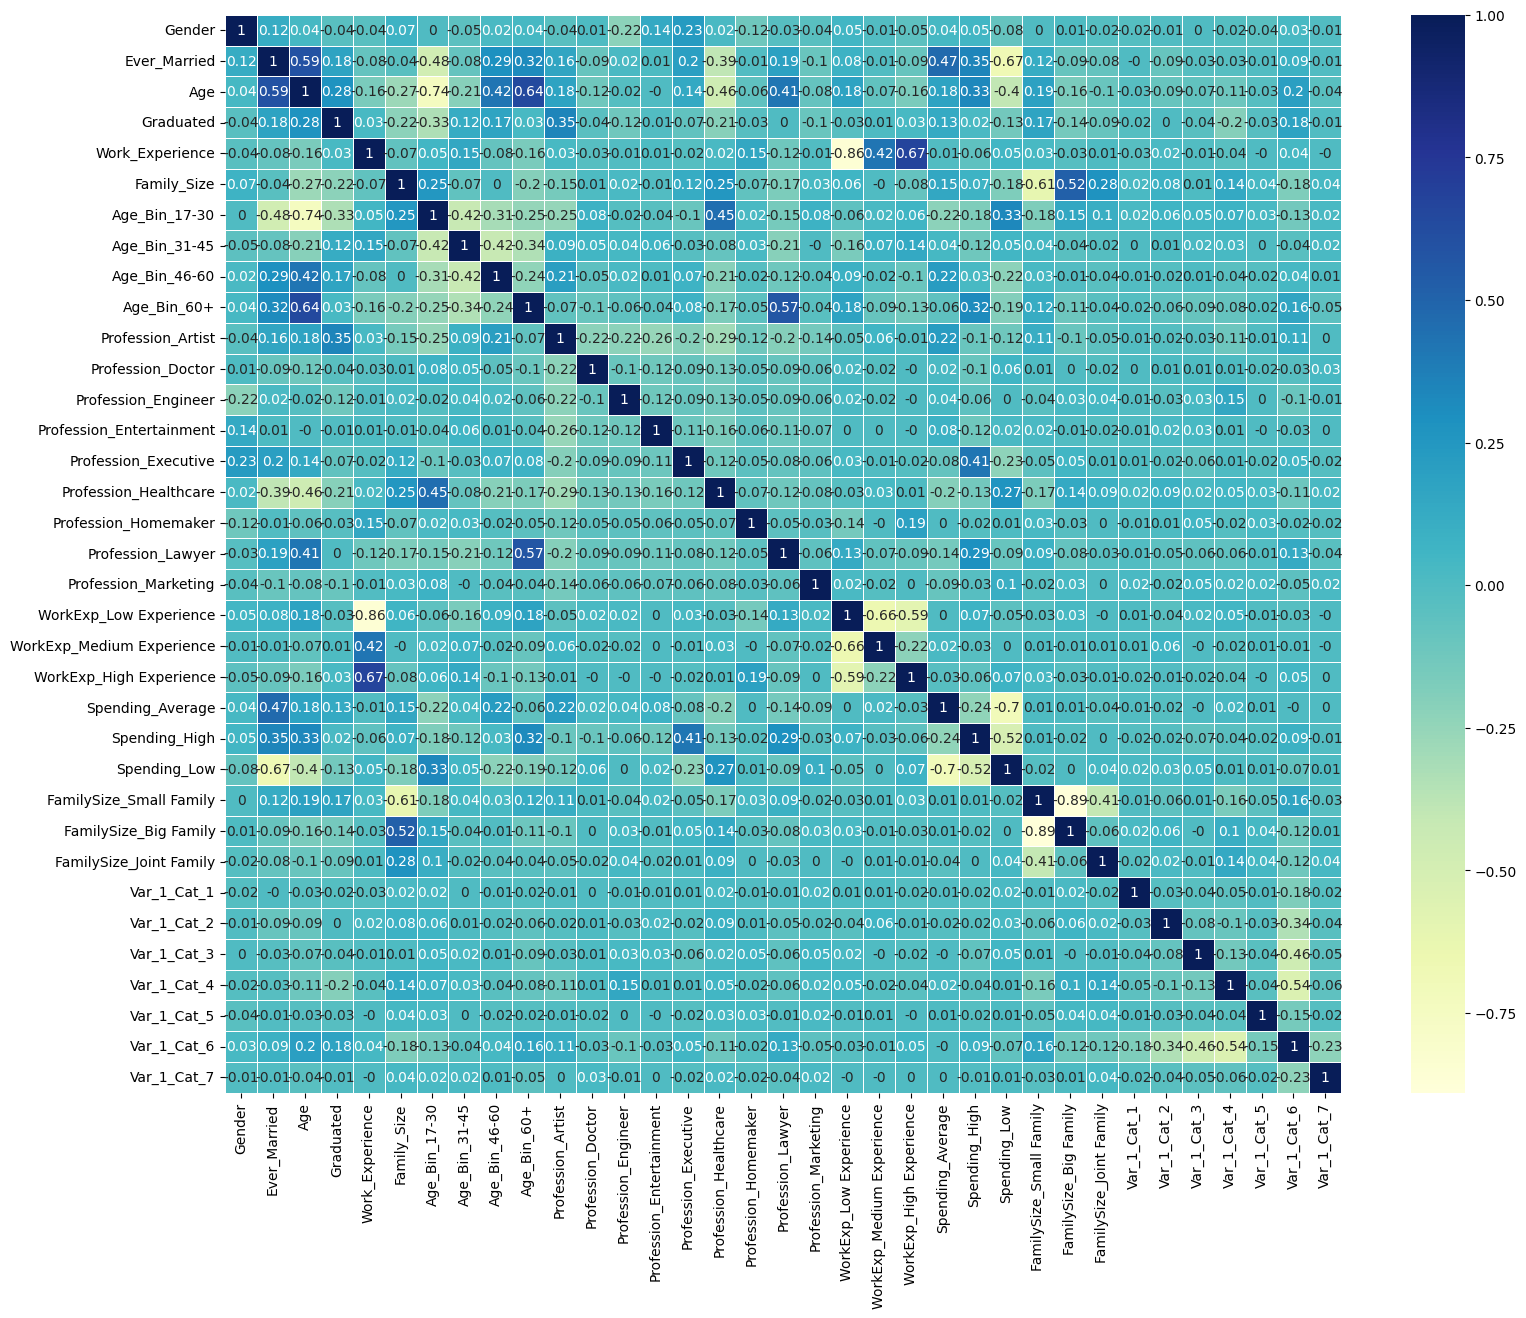

In [ ]:
plt.figure(figsize=(18, 14))
sns.heatmap(customers_dummy.corr(method='spearman').round(2), linewidths=0.5, annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
customers.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,72
Profession,113
Work_Experience,790
Spending_Score,0
Family_Size,317
Var_1,72
Segmentation,0


In [ ]:
customers.loc[(pd.isnull(customers.Ever_Married)) & ((customers.Spending_Score == 'Average') | (customers.Spending_Score =='High')), "Ever_Married"] = 'Yes'

In [ ]:
customers.loc[(pd.isnull(customers.Ever_Married)) & (customers.Spending_Score == 'Low') , "Ever_Married"] = 'No'

In [ ]:
customers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
customers['Profession'] = customers['Profession'].fillna(method='pad')

<ipython-input-56-9e461d8213b9>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers['Profession'] = customers['Profession'].fillna(method='pad')
<ipython-input-56-9e461d8213b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Profession'] = customers['Profession'].fillna(method='pad')


In [ ]:
customers['Graduated'] = customers['Graduated'].fillna(method='pad')
customers['Work_Experience'] = customers['Work_Experience'].fillna(method='pad')
customers['Family_Size'] = customers['Family_Size'].fillna(method='pad')
customers['Var_1'] = customers['Var_1'].fillna(method='pad')

<ipython-input-57-35009dd57b26>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers['Graduated'] = customers['Graduated'].fillna(method='pad')
<ipython-input-57-35009dd57b26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Graduated'] = customers['Graduated'].fillna(method='pad')
<ipython-input-57-35009dd57b26>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers['Work_Experience'] = customers['Work_Experience'].fillna(method='pad')
<ipython-input-57-35009dd57b26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [ ]:
customers.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


In [ ]:
customers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8063,Male,No,22,No,Artist,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
customers['Gender'] = customers['Gender'].replace(('Male', 'Female'), (1,0))
customers['Graduated'] = customers['Graduated'].replace(('Yes', 'No'), (1,0))
customers['Ever_Married'] = customers['Ever_Married'].replace(('Yes', 'No'), (1,0))
customers['Spending_Score'] = customers['Spending_Score'].replace(('Low', 'Average', 'High'), (1, 2, 3))

<ipython-input-61-a0dd73cc8c4d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers['Gender'] = customers['Gender'].replace(('Male', 'Female'), (1,0))
<ipython-input-61-a0dd73cc8c4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Gender'] = customers['Gender'].replace(('Male', 'Female'), (1,0))
<ipython-input-61-a0dd73cc8c4d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(cop

In [ ]:
customers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,prof_freq
0,1,0,22,0,Healthcare,1.0,1,4.0,Cat_4,D,0.705635
1,0,1,38,1,Engineer,1.0,2,3.0,Cat_4,A,0.367435
2,0,1,67,1,Engineer,1.0,1,1.0,Cat_6,B,0.272334
3,1,1,67,1,Lawyer,0.0,3,2.0,Cat_6,B,0.254237
4,0,1,40,1,Entertainment,0.0,3,6.0,Cat_6,A,0.380802
...,...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,Artist,0.0,3,5.0,Cat_6,B,0.308977
8063,1,0,22,0,Artist,0.0,1,7.0,Cat_1,D,0.065136
8064,1,0,35,0,Executive,3.0,1,4.0,Cat_4,D,0.194828
8066,0,0,27,1,Healthcare,1.0,1,4.0,Cat_6,B,0.083263


In [ ]:
proffesion_dict = {}
for prof_index in customers.Profession.value_counts().index:
  for target_index in customers.Segmentation.value_counts().index:
    try:
      proffesion_dict[" ".join([target_index, prof_index])] = customers[customers.Segmentation == target_index].Profession.value_counts()[prof_index] / customers.Profession.value_counts()[prof_index]
    except:
      proffesion_dict[" ".join([target_index, prof_index])] = 0

In [ ]:
proffesion_dict

{'D Artist': 0.0651356993736952,
 'A Artist': 0.22755741127348644,
 'C Artist': 0.3983298538622129,
 'B Artist': 0.3089770354906054,
 'D Healthcare': 0.7056349873843566,
 'A Healthcare': 0.09083263246425567,
 'C Healthcare': 0.12026913372582002,
 'B Healthcare': 0.0832632464255677,
 'D Entertainment': 0.2289029535864979,
 'A Entertainment': 0.3808016877637131,
 'C Entertainment': 0.15611814345991562,
 'B Entertainment': 0.23417721518987342,
 'D Engineer': 0.25360230547550433,
 'A Engineer': 0.36743515850144093,
 'C Engineer': 0.10662824207492795,
 'B Engineer': 0.2723342939481268,
 'D Doctor': 0.2968299711815562,
 'A Doctor': 0.29250720461095103,
 'C Doctor': 0.20317002881844382,
 'B Doctor': 0.207492795389049,
 'D Lawyer': 0.2135593220338983,
 'A Lawyer': 0.31186440677966104,
 'C Lawyer': 0.22033898305084745,
 'B Lawyer': 0.2542372881355932,
 'D Executive': 0.19482758620689655,
 'A Executive': 0.21551724137931033,
 'C Executive': 0.2793103448275862,
 'B Executive': 0.3103448275862069,

In [ ]:
prof_freq = customers[['Segmentation', 'Profession']].apply(lambda x : proffesion_dict.get(" ".join(x)), axis=1)
customers['prof_freq'] = prof_freq

<ipython-input-67-3dab3de8c68f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['prof_freq'] = prof_freq


In [ ]:
var_dict = {}
for var_index in customers.Var_1.value_counts().index:
  for target_index in customers.Segmentation.value_counts().index:
    try:
      var_dict[" ".join([target_index, var_index])] = customers[customers.Segmentation == target_index].Var_1.value_counts()[var_index] / customers.Var_1.value_counts()[var_index]
    except:
      var_dict[" ".join([target_index, var_index])] = 0

In [ ]:
var_dict

{'D Cat_6': 0.23811467047541318,
 'A Cat_6': 0.23893083044276678,
 'C Cat_6': 0.27892266884309325,
 'B Cat_6': 0.2440318302387268,
 'D Cat_4': 0.3714020427112349,
 'A Cat_4': 0.30919220055710306,
 'C Cat_4': 0.10306406685236769,
 'B Cat_4': 0.21634168987929434,
 'D Cat_3': 0.3083538083538084,
 'A Cat_3': 0.2764127764127764,
 'C Cat_3': 0.18673218673218672,
 'B Cat_3': 0.2285012285012285,
 'D Cat_2': 0.3054892601431981,
 'A Cat_2': 0.20286396181384247,
 'C Cat_2': 0.2386634844868735,
 'B Cat_2': 0.2529832935560859,
 'D Cat_7': 0.3137254901960784,
 'A Cat_7': 0.24509803921568626,
 'C Cat_7': 0.23039215686274508,
 'B Cat_7': 0.2107843137254902,
 'D Cat_1': 0.3787878787878788,
 'A Cat_1': 0.23484848484848486,
 'C Cat_1': 0.18181818181818182,
 'B Cat_1': 0.20454545454545456,
 'D Cat_5': 0.3411764705882353,
 'A Cat_5': 0.21176470588235294,
 'C Cat_5': 0.21176470588235294,
 'B Cat_5': 0.23529411764705882}

In [ ]:
var_freq = customers[['Segmentation', 'Var_1']].apply(lambda x: var_dict.get(" ".join(x)), axis=1)
customers['var_freq'] = var_freq

<ipython-input-71-8951bd05d839>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['var_freq'] = var_freq


In [ ]:
customers

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,prof_freq,var_freq
0,1,0,22,0,Healthcare,1.0,1,4.0,Cat_4,D,0.705635,0.371402
1,0,1,38,1,Engineer,1.0,2,3.0,Cat_4,A,0.367435,0.309192
2,0,1,67,1,Engineer,1.0,1,1.0,Cat_6,B,0.272334,0.244032
3,1,1,67,1,Lawyer,0.0,3,2.0,Cat_6,B,0.254237,0.244032
4,0,1,40,1,Entertainment,0.0,3,6.0,Cat_6,A,0.380802,0.238931
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,Artist,0.0,3,5.0,Cat_6,B,0.308977,0.244032
8063,1,0,22,0,Artist,0.0,1,7.0,Cat_1,D,0.065136,0.378788
8064,1,0,35,0,Executive,3.0,1,4.0,Cat_4,D,0.194828,0.371402
8066,0,0,27,1,Healthcare,1.0,1,4.0,Cat_6,B,0.083263,0.244032


In [ ]:
customers.drop(columns=['Var_1', 'Profession'], inplace=True)

<ipython-input-73-a260c6da78be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers.drop(columns=['Var_1', 'Profession'], inplace=True)


In [ ]:
customers['Segmentation'] = customers['Segmentation'].replace(('A', 'B', 'C', 'D'), (1, 2, 3, 4))

<ipython-input-74-17ae03ac793c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers['Segmentation'] = customers['Segmentation'].replace(('A', 'B', 'C', 'D'), (1, 2, 3, 4))
<ipython-input-74-17ae03ac793c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Segmentation'] = customers['Segmentation'].replace(('A', 'B', 'C', 'D'), (1, 2, 3, 4))


In [ ]:
customers

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,prof_freq,var_freq
0,1,0,22,0,1.0,1,4.0,4,0.705635,0.371402
1,0,1,38,1,1.0,2,3.0,1,0.367435,0.309192
2,0,1,67,1,1.0,1,1.0,2,0.272334,0.244032
3,1,1,67,1,0.0,3,2.0,2,0.254237,0.244032
4,0,1,40,1,0.0,3,6.0,1,0.380802,0.238931
...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0.0,3,5.0,2,0.308977,0.244032
8063,1,0,22,0,0.0,1,7.0,4,0.065136,0.378788
8064,1,0,35,0,3.0,1,4.0,4,0.194828,0.371402
8066,0,0,27,1,1.0,1,4.0,2,0.083263,0.244032


## Model Analysis

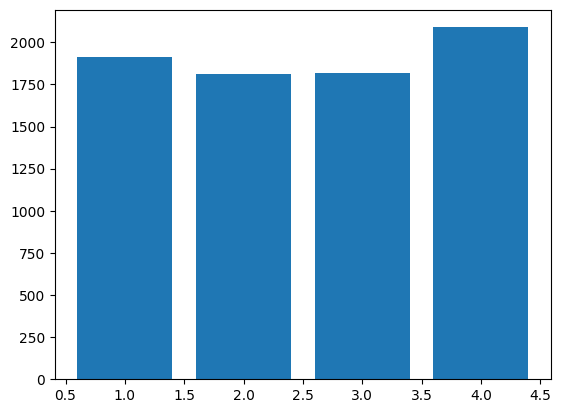

In [ ]:
plt.bar(customers.Segmentation.value_counts().index, customers.Segmentation.value_counts().values)
plt.show()
## Agloritmii de oversampling pot fi folositi si pentru a balansa seturile de date multiclasa

In [ ]:
X = customers.drop(columns=['Segmentation'])
y = customers.Segmentation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

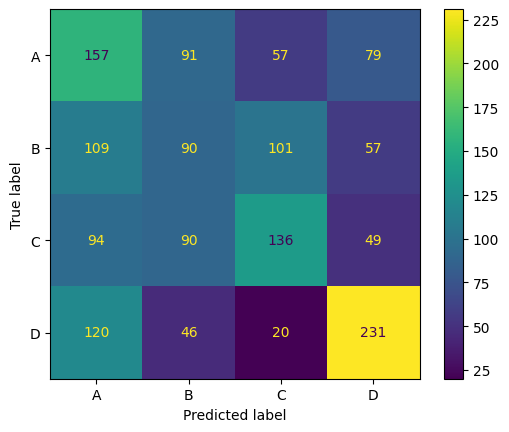

--------------------------------------------------
Classifier:  SVC
Classification report:
                precision    recall  f1-score   support

           1       0.33      0.41      0.36       384
           2       0.28      0.25      0.27       357
           3       0.43      0.37      0.40       369
           4       0.56      0.55      0.55       417

    accuracy                           0.40      1527
   macro avg       0.40      0.40      0.40      1527
weighted avg       0.40      0.40      0.40      1527



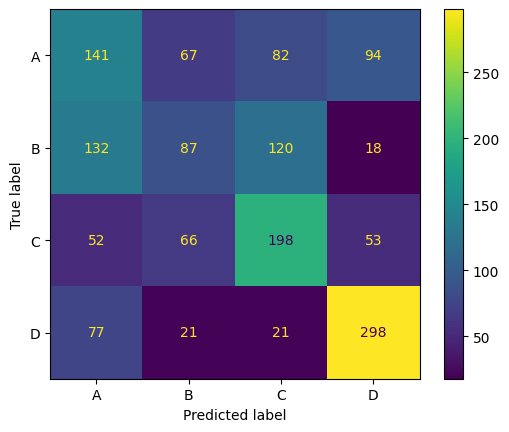

--------------------------------------------------
Classifier:  LR
Classification report:
                precision    recall  f1-score   support

           1       0.35      0.37      0.36       384
           2       0.36      0.24      0.29       357
           3       0.47      0.54      0.50       369
           4       0.64      0.71      0.68       417

    accuracy                           0.47      1527
   macro avg       0.46      0.47      0.46      1527
weighted avg       0.46      0.47      0.46      1527



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# svc = SVC(kernel="sigmoid", gamma=1.0)
svc = SVC(kernel="rbf", gamma=1.0, C=1.0)
lrc = LogisticRegression(penalty='l2', solver='liblinear')

clfs = {'SVC': svc,
        'LR': lrc}

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def train_classifier(clfs, X_train, y_train, X_test, y_test):
  clfs.fit(X_train, y_train)
  y_pred = clfs.predict(X_test)

  report = classification_report(y_test, y_pred)

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C', 'D'])
  disp.plot()
  plt.show()

  return report


for name, clfs in clfs.items():
  report = train_classifier(clfs, X_train, y_train, X_test, y_test)
  print("--------------------------------------------------")
  print("Classifier: ", name)
  print("Classification report:\n ", report)

In [ ]:
X_test.iloc[0]

,1110
Gender,0.000000
Ever_Married,0.000000
Age,40.000000
Graduated,1.000000
Work_Experience,9.000000
Spending_Score,1.000000
Family_Size,2.000000
prof_freq,0.272334
var_freq,0.216342


In [ ]:
svc.predict(X_test.iloc[[0]])

array([4])

In [ ]:
svc2 = SVC(kernel="rbf", gamma=1.0, C=1.0, probability=True)
svc2.fit(X_train, y_train)

SVC(gamma=1.0, probability=True)

In [ ]:
svc2.predict_proba(X_test.iloc[[0]])

array([[0.22623739, 0.12560119, 0.09658301, 0.55157841]])